In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [3]:
# Import Spotify dataset
df = pd.read_csv('Resources/spotify_songs.csv')
# Drop unnecessary columns
columns_to_drop = ['track_id', 'track_album_release_date', 'playlist_genre', 'track_name', 
                   'track_artist', 'track_album_id', 'playlist_subgenre', 'track_album_name', 
                   'playlist_name', 'playlist_id']
df_clean = df.drop(columns=columns_to_drop)

# Drop rows where track_popularity is 0
df_clean = df_clean[df_clean['track_popularity'] != 0]

# Normalize numerical columns
numerical_features = ['danceability', 'energy', 'loudness', 'speechiness', 
                      'acousticness', 'instrumentalness', 'liveness', 'valence', 
                      'tempo', 'duration_ms']
scaler = StandardScaler()
df_clean[numerical_features] = scaler.fit_transform(df_clean[numerical_features])


In [11]:



# Define features (X) and target (y)
X = df_clean.drop(['track_popularity'], axis=1)
y = df_clean['track_popularity']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Train a baseline Random Forest Regressor
rf_baseline = RandomForestRegressor(random_state=42)
rf_baseline.fit(X_train, y_train)

# Predictions and RMSE for the baseline model
y_pred_baseline = rf_baseline.predict(X_test)
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline))

print(f"Baseline Random Forest RMSE: {baseline_rmse:.4f}")


Baseline Random Forest RMSE: 18.6999


In [6]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [7]:
# Check the accuracy of the Random Forest model
accuracy = best_rf.score(X_test, y_test)
print(f"Random Forest Model Accuracy: {accuracy:.4f}")


Random Forest Model Accuracy: 0.3015


MAE: 14.17312496470186
RMSE: 18.66633547113707
R² Score: 0.30146946695889043


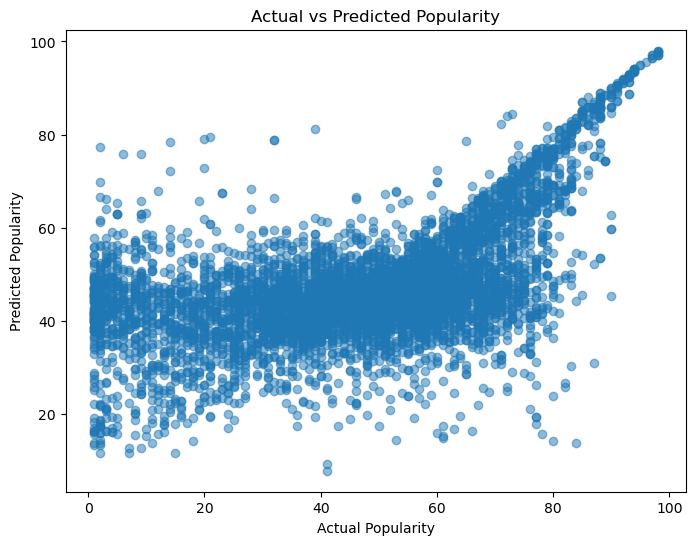

In [12]:
# Predictions with the tuned model
y_pred = best_rf.predict(X_test)

# Calculate evaluation metrics
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

# Visualize predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity')
plt.show()